# Import 

In [1]:
import pandas as pd
from transformers import AutoTokenizer
import re

# Read Data

In [2]:
def preprocess(df):
    df["text"] = df["text"].astype(str)
    df["class"] = df["class"].astype(str)
    df.drop_duplicates(["class", "text"], inplace=True)
    df.reset_index(drop=True, inplace=True)
    df["clear_text"] = df["text"].apply(lambda x: " ".join(
        re.findall(r"[а-яА-Я0-9 ёЁ\-\.,?!+a-zA-Z]+", x)))

    return df


train = pd.read_csv("dataset/sample.csv")
extra_train = pd.read_csv("dataset/extra_sample.csv")
extra_train_v2 = pd.read_csv("dataset/extra_sample.csv")
train = pd.concat([train, extra_train, extra_train_v2], axis=0)
print(train.shape)
train = preprocess(train)
print(train.shape)

(1847, 2)
(1171, 3)


# Statistic

In [3]:
train["class"].value_counts(dropna=False)

class
arrangement       324
order             310
contract          178
application        72
proxy              69
act                69
invoice            42
bill               41
statute            31
contract offer     25
determination      10
Name: count, dtype: int64

In [4]:
tok = AutoTokenizer.from_pretrained("intfloat/multilingual-e5-large")

In [5]:
train["text_len"] = train.text.apply(lambda x: len(tok(x)["input_ids"]))
train["clear_text_len"] = train.clear_text.apply(lambda x: len(tok(x)["input_ids"]))

Token indices sequence length is longer than the specified maximum sequence length for this model (1471 > 512). Running this sequence through the model will result in indexing errors


<Axes: >

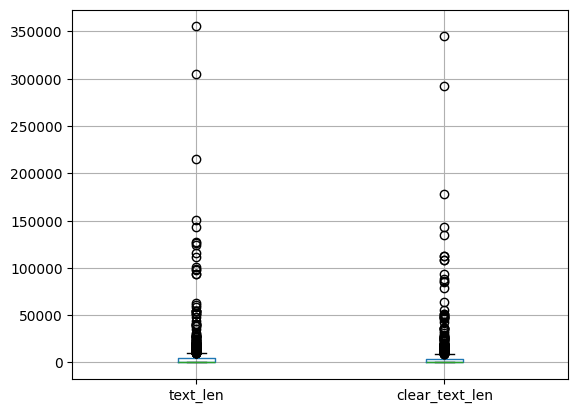

In [6]:
train.boxplot(column=['text_len', "clear_text_len"])